In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Load the dataset from a CSV file
dataset = pd.read_csv('C:/Users/thale/Desktop/Piyose/urbanandruralpopulation new.csv')




dataset



,country,Code country,Year,Urban population,Rural population
0,Afghanistan,AFG,1960,724373,7898093
1,Afghanistan,AFG,1961,763336,8026804
2,Afghanistan,AFG,1962,805062,8163985
3,Afghanistan,AFG,1963,849446,8308019
4,Afghanistan,AFG,1964,896820,8458694
...,...,...,...,...,...
14163,Zimbabwe,ZWE,2017,4755312,9995789
14164,Zimbabwe,ZWE,2018,4848158,10204026
14165,Zimbabwe,ZWE,2019,4945719,10408889
14166,Zimbabwe,ZWE,2020,5052214,10617452


In [2]:
#Summary Statistics
summary_stats = dataset.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                Year  Urban population
count  14168.000000      1.416800e+04
mean    1990.533879      5.097131e+07
std       17.895499      2.442102e+08
min     1960.000000      8.590000e+02
25%     1975.000000      2.385732e+05
50%     1991.000000      2.029394e+06
75%     2006.000000      8.821502e+06
max     2021.000000      4.454153e+09


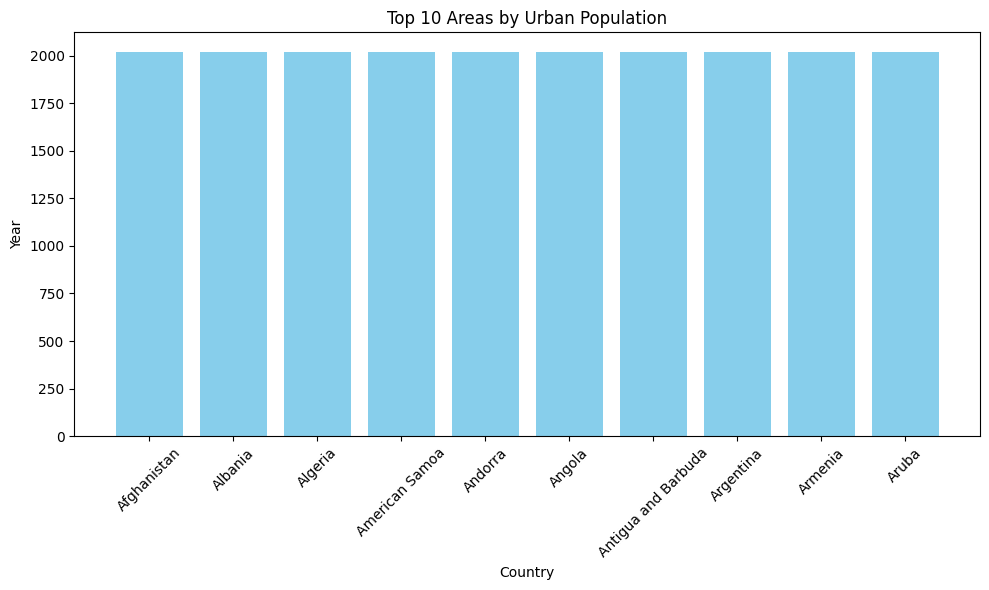

In [10]:
# Sort the dataset by Urban Population and select the top 10 areas (countries in this case)
top_10_urban_population = dataset.nlargest(10, 'Year')

# Create the bar chart for Top 10 Areas by Urban Population
plt.figure(figsize=(10, 6))
plt.bar(top_10_urban_population['country'], top_10_urban_population['Year'], color='skyblue')

# Add labels and title
plt.xticks(rotation=45)
plt.title('Top 10 Areas by Urban Population')
plt.xlabel('Country')
plt.ylabel('Year')
plt.tight_layout()

# Display the plot
plt.show()

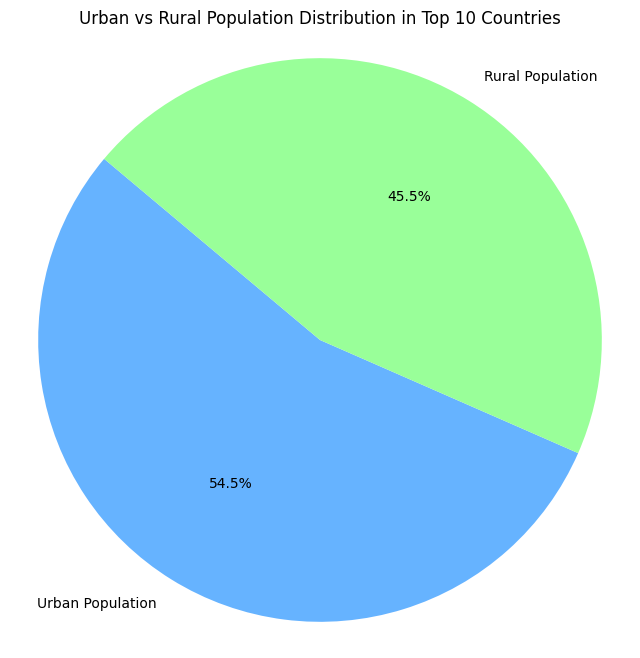

In [16]:
# Convert 'Urban population' and 'Rural population' to numeric, forcing errors to NaN
dataset['Urban population'] = pd.to_numeric(dataset['Urban population'], errors='coerce')
dataset['Rural population'] = pd.to_numeric(dataset['Rural population'], errors='coerce')

# Drop rows with NaN values in these columns (optional, if necessary)
dataset = dataset.dropna(subset=['Urban population', 'Rural population'])

# Sort the dataset by Urban Population and select the top 10 areas (countries in this case)
top_10_urban_population = dataset.nlargest(10, 'Urban population')

# Data for the pie chart: Urban and Rural Population
urban_population_total = top_10_urban_population['Urban population'].sum()
rural_population_total = top_10_urban_population['Rural population'].sum()

# Make sure there's valid data before plotting
if urban_population_total > 0 and rural_population_total > 0:
    # Data to plot
    labels = ['Urban Population', 'Rural Population']
    sizes = [urban_population_total, rural_population_total]
    colors = ['#66b3ff', '#99ff99']

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

    # Add a title
    plt.title('Urban vs Rural Population Distribution in Top 10 Countries')

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Display the plot
    plt.show()
else:
    print("Error: Urban or Rural population totals are zero or invalid.")


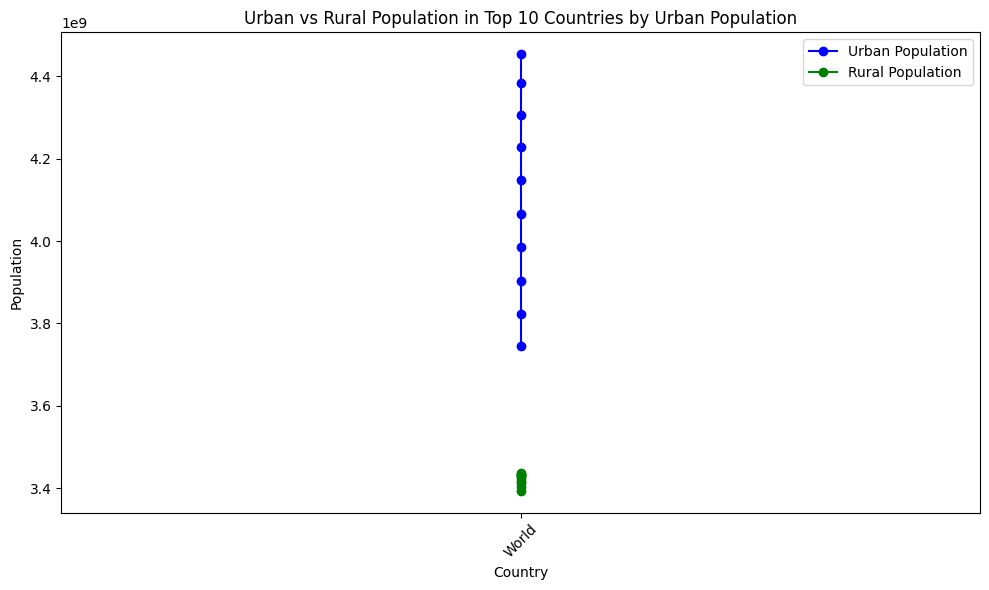

In [23]:

warnings.filterwarnings('ignore')

# Convert 'Urban population' and 'Rural population' to numeric, forcing errors to NaN
dataset['Urban population'] = pd.to_numeric(dataset['Urban population'], errors='coerce')
dataset['Rural population'] = pd.to_numeric(dataset['Rural population'], errors='coerce')

# Drop rows with NaN values in these columns (optional, if necessary)
dataset = dataset.dropna(subset=['Urban population', 'Rural population'])

# Sort the dataset by Urban Population and select the top 10 areas (countries in this case)
top_10_urban_population = dataset.nlargest(10, 'Urban population')

# Plotting the line graph
plt.figure(figsize=(10, 6))

# Plot the Urban Population
plt.plot(top_10_urban_population['country'], top_10_urban_population['Urban population'], marker='o', color='b', label='Urban Population')

# Plot the Rural Population
plt.plot(top_10_urban_population['country'], top_10_urban_population['Rural population'], marker='o', color='g', label='Rural Population')

# Add labels and title
plt.xticks(rotation=45)
plt.title('Urban vs Rural Population in Top 10 Countries by Urban Population')
plt.xlabel('Country')
plt.ylabel('Population')
plt.legend(loc='upper right')

# Ensure layout fits well
plt.tight_layout()

# Display the plot
plt.show()


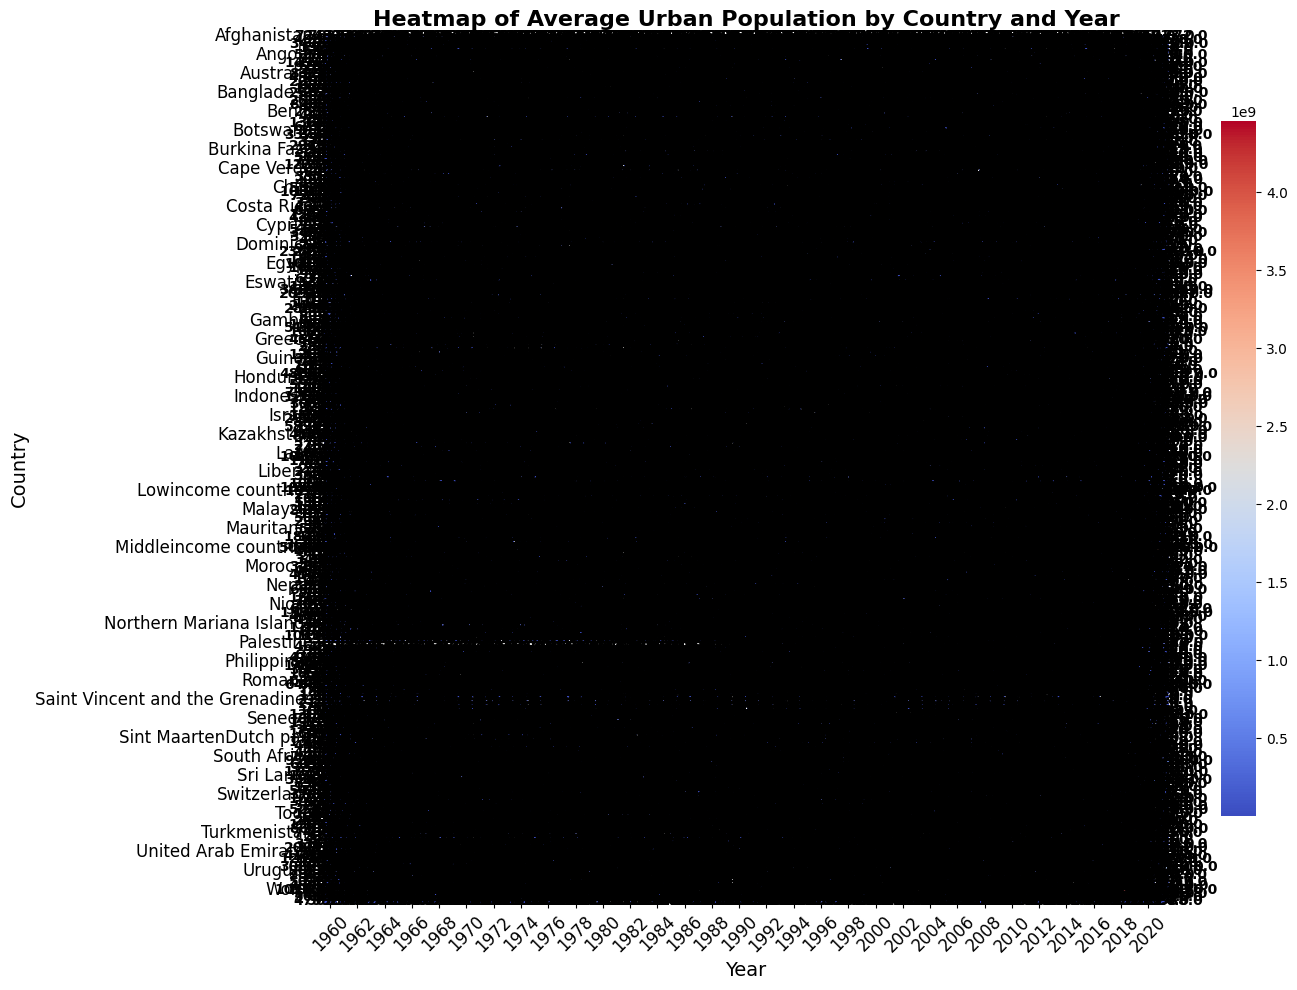

In [25]:
# Ensure that 'Urban population' and 'Rural population' are numeric
dataset['Urban population'] = pd.to_numeric(dataset['Urban population'], errors='coerce')
dataset['Rural population'] = pd.to_numeric(dataset['Rural population'], errors='coerce')

# Pivot the dataset for heatmap
heatmap_data = dataset.pivot_table(index='country', columns='Year', values='Urban population', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    heatmap_data,
    cmap='coolwarm',  # Different color map for better contrast
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={"shrink": 0.8},  # Customize color bar
    annot_kws={"size": 10, "weight": "bold", "color": "black"},  # Font size and color
)

# Add titles and labels with more detail
plt.title('Heatmap of Average Urban Population by Country and Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Adjust ticks for clarity
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# Display the heatmap
plt.tight_layout()
plt.show()


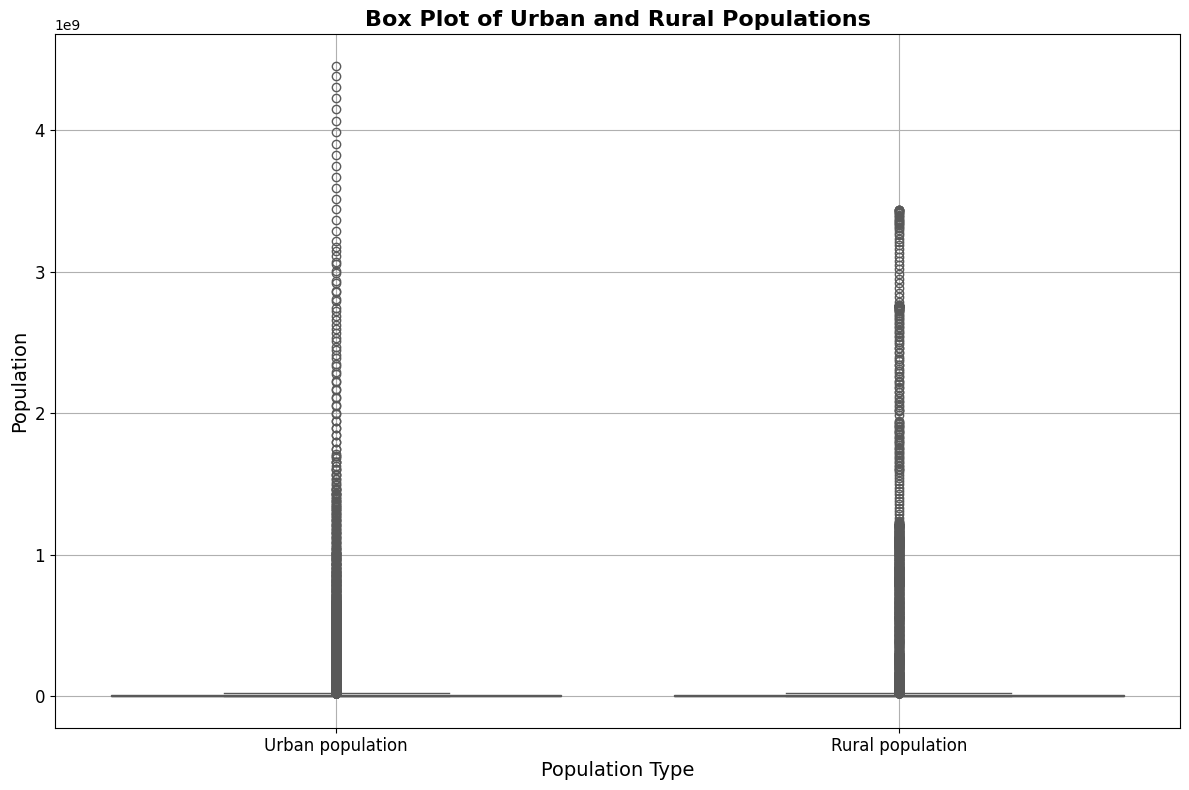

In [26]:
# Ensure that 'Urban population' and 'Rural population' are numeric
dataset['Urban population'] = pd.to_numeric(dataset['Urban population'], errors='coerce')
dataset['Rural population'] = pd.to_numeric(dataset['Rural population'], errors='coerce')

# Melt the dataset for easier plotting
melted_data = dataset.melt(id_vars=['country', 'Year'], 
                            value_vars=['Urban population', 'Rural population'], 
                            var_name='Population Type', 
                            value_name='Population')

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Population Type', y='Population', data=melted_data, palette='Set2')
plt.title('Box Plot of Urban and Rural Populations', fontsize=16, weight='bold')
plt.xlabel('Population Type', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

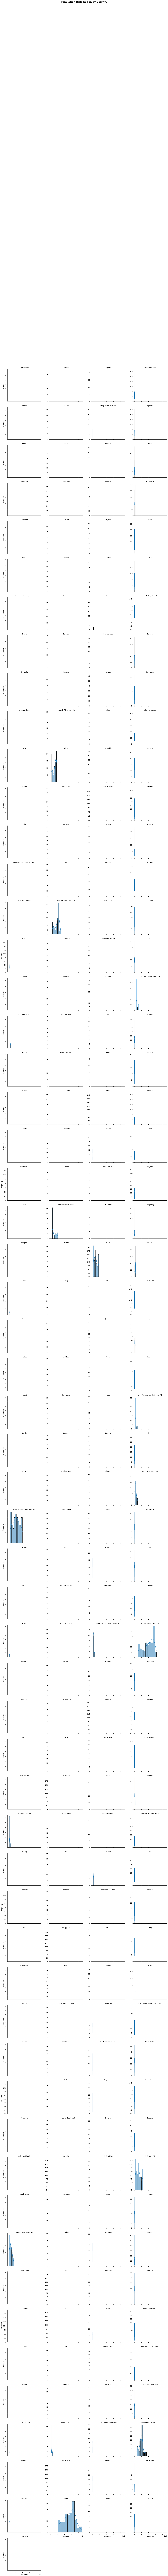

In [27]:
# Create a FacetGrid to show distributions by Country
g = sns.FacetGrid(melted_data, col='country', col_wrap=4, height=4, sharey=False)
g.map(sns.histplot, 'Population', bins=10, kde=True)  # Add KDE for smoother distribution
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Population', 'Frequency')
g.fig.suptitle('Population Distribution by Country', fontsize=16, weight='bold', y=1.05)
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()
